Зачет 3.

1. Загрузите данные.
2. Посчитайте размерность данных.
3. Посчитайте количество пропущенных значений в каждой переменной.
4. Выведите тип данных каждой переменной. (См pandas.DataFrame.dtypes — pandas 1.2.3 documentation (pydata.org))
5. Вина какой области (province) получают наилучший рейтинг?
6. На основе словаря color создайте переменную, в которой закодирован цвет вина. (map)
7. Удалите наблюдения для которых цвет (color) не указан.
8. Визуализируйте распределения числовых переменных.
9. Для каждой страны рассчитайте долю каждого вида вина. В какой стране доля белого вина наибольшая, а в какой красного? 
   (Нужен ответ вида: в стране А наибольшая доля белого вина, а в стране B — красного.
10. Заполните ответы в тест и отправьте сохраненный файл в формате pdf
11. Дополнительно можно посмотреть Пример исследовательского анализа данных и сделать что-то аналогичное.

In [7]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#1
df = pd.read_csv('G:/study/documents_study/materials/wine_1.csv')
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek


In [10]:
#2
df.shape

(20000, 10)

In [11]:
#3
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      20000 non-null  object 
 1   description  20000 non-null  object 
 2   designation  13999 non-null  object 
 3   points       20000 non-null  int64  
 4   price        18198 non-null  float64
 5   province     20000 non-null  object 
 6   region_1     16543 non-null  object 
 7   region_2     8058 non-null   object 
 8   variety      20000 non-null  object 
 9   winery       20000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.5+ MB


country            0
description        0
designation     6001
points             0
price           1802
province           0
region_1        3457
region_2       11942
variety            0
winery             0
dtype: int64

In [12]:
#4
df.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [13]:
#df.sort_values('points', ascending=False)
top_wines = df[df['points'] == 100]


In [14]:
#5
province = top_wines.pivot_table(df, 
                          index='province')
print(province)



            points   price
province                  
California     100   245.0
Champagne      100  1400.0
Tuscany        100   460.0


In [24]:
#6
color = {"Chardonnay": "white",
"Pinot Noir": 'red',
"Cabernet Sauvignon": "red",
"Red Blend": "red",
"Bordeaux-style Red Blend": "red",
"Sauvignon Blanc": "white",
"Syrah": "red",
"Riesling": "white",
"Merlot": "red",
"Zinfandel": "red",
"Sangiovese": "red",
"Malbec": "red",
"White Blend": "white",
"Rosé": "other",
"Tempranillo": "red",
"Nebbiolo": "red",
"Portuguese Red": "red",
"Sparkling Blend": "other",
"Shiraz": "red",
"Corvina, Rondinella, Molinara": "red",
"Rhône-style Red Blend": "red",
"Barbera": "red",
"Pinot Gris": "white",
"Viognier": "white",
"Bordeaux-style White Blend": "white",
"Champagne Blend": "other",
"Port": "red",
"Grüner Veltliner": "white",
"Gewürztraminer": "white",
"Portuguese White": "white",
"Petite Sirah": "red",
"Carmenère": "red"}

#dfcolor = pd.DataFrame(color,index=['color']).T
df['color'] = df['variety'].map(color)
df.head(10)




,country,description,designation,points,price,province,region_1,region_2,variety,winery,color
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch,red
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla,red
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte,red
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano,red
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek,red
5,Austria,"This is always a major wine, and this vintage ...",Dürnsteiner Kellerberg Smaragd,96,89.0,Wachau,NaN,NaN,Riesling,F X Pichler,white
6,US,"Tastes excessively sharp throughout, with a cu...",Distraction,84,40.0,California,Paso Robles,Central Coast,Bordeaux-style Red Blend,Pear Valley,red
7,US,Addictive aromas of hot blackberry pie laced w...,White Hawk Vineyard,93,40.0,California,Santa Barbara County,Central Coast,Syrah,Mulvane Wine Co.,red
8,US,Marc Piro broke away from his day job at Au Bo...,Presqu'ile Vineyard,93,44.0,California,Santa Maria Valley,Central Coast,Pinot Noir,Piro,red
9,US,"A soft, round Merlot made from what tastes lik...",Larry Venturi Vineyards,85,35.0,California,Mendocino,Mendocino/Lake Counties,Merlot,Simaine Cellars,red


In [25]:
#7
df2 = df.loc[df['color'] != 'other']
proverka = df.pivot_table(df, 
                          index='color',
                          aggfunc=np.mean)
print(proverka)

          points      price
color                      
other  87.331808  30.707031
red    88.168158  38.086357
white  87.721363  27.088496


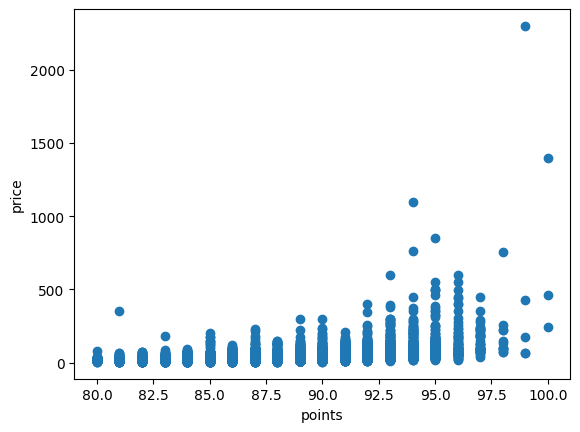

In [17]:
#8

plt.xlabel('points')
plt.ylabel('price')
plt.scatter(x=df['points'], y=df['price'])

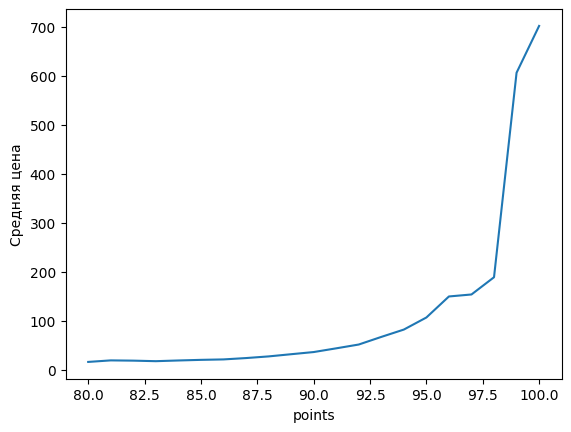

In [18]:
#8.1
d = df.groupby('points').mean()
plt.xlabel('points')
plt.ylabel('Средняя цена')
plt.plot(d.index, d.values)

<BarContainer object of 7 artists>

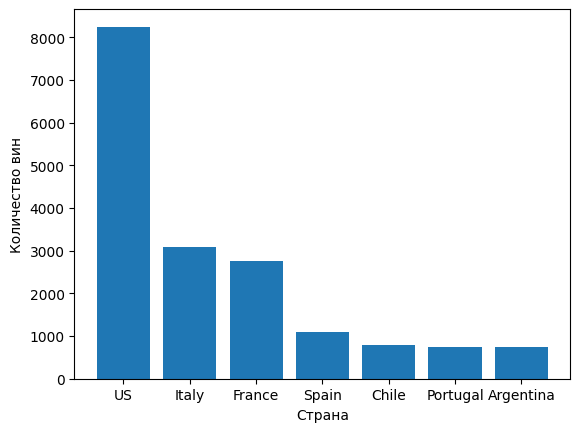

In [19]:
#8.2
countries = df['country'].value_counts().head(7)
plt.xlabel('Cтрана')
plt.ylabel('Количество вин')
plt.bar(x=countries.index, height=countries.values)

(array([0.0124, 0.    , 0.0212, 0.    , 0.0509, 0.    , 0.0811, 0.    ,
        0.1454, 0.    , 0.1653, 0.    , 0.1982, 0.    , 0.2813, 0.    ,
        0.2352, 0.    , 0.1644, 0.    , 0.2088, 0.    , 0.1415, 0.    ,
        0.1255, 0.    , 0.0784, 0.    , 0.0506, 0.    , 0.0232, 0.    ,
        0.0088, 0.    , 0.0051, 0.    , 0.0017, 0.    , 0.0007, 0.0003]),
 array([ 80. ,  80.5,  81. ,  81.5,  82. ,  82.5,  83. ,  83.5,  84. ,
         84.5,  85. ,  85.5,  86. ,  86.5,  87. ,  87.5,  88. ,  88.5,
         89. ,  89.5,  90. ,  90.5,  91. ,  91.5,  92. ,  92.5,  93. ,
         93.5,  94. ,  94.5,  95. ,  95.5,  96. ,  96.5,  97. ,  97.5,
         98. ,  98.5,  99. ,  99.5, 100. ]),
 <BarContainer object of 40 artists>)

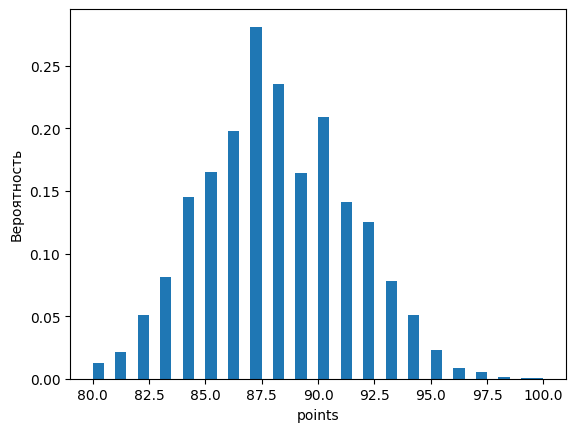

In [20]:
#8.3
plt.xlabel('points')
plt.ylabel('Вероятность')
plt.hist(x=df['points'], bins=40, density=True)

In [21]:
#9
df2.head(10)

group=df.groupby(['country','color'])
stats=pd.DataFrame(group.agg('count')['variety'])
stats.head(15)

variety
country   color         
Argentina other       12
          red        528
          white       87
Australia other       14
          red        325
          white      169
Austria   other        6
          red         33
          white      261
Brazil    other        2
Bulgaria  red          6
          white        3
Canada    red          5
          white       16
Chile     other       13